In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("LoanApprovalPrediction.csv")

In [2]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [4]:
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,float64
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


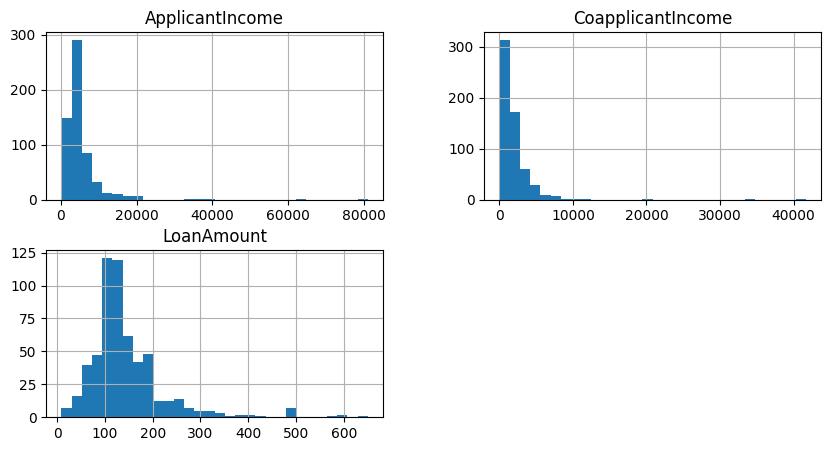

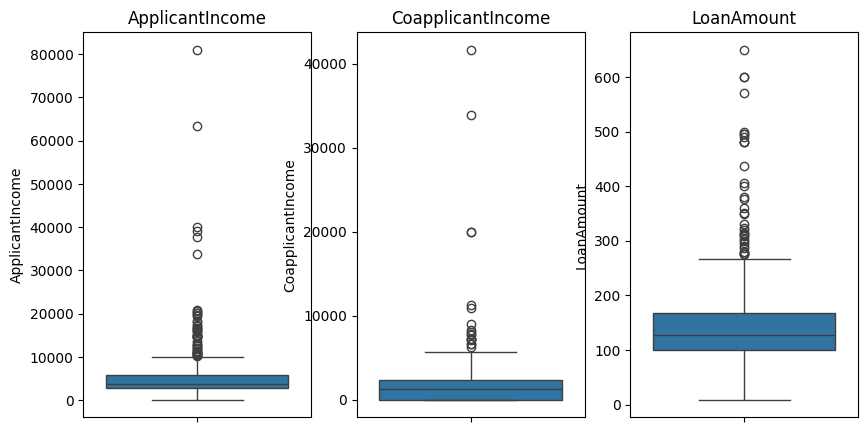

In [5]:
numerical_variables = ["ApplicantIncome", "CoapplicantIncome","LoanAmount"]

# Plot histograms
data[numerical_variables].hist(figsize=(10, 5), bins=30)
plt.show()

# Plot boxplots to check for outliers
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_variables, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.show()

In [6]:
from sklearn.preprocessing import RobustScaler

# Apply RobustScaler
scaler = RobustScaler()
data[numerical_variables] = scaler.fit_transform(data[numerical_variables])

print(data.head())

    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.712219          -0.521299         NaN             360.0   
1         0.270873           0.127582    0.014925             360.0   
2        -0.280983          -0.521299   -0.910448             360.0   
3        -0.426355           0.493330   -0.104478             360.0   
4         0.764860          -0.521299    0.208955             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             

In [7]:
# Dropping Loan_ID column
data.drop(['Loan_ID'],axis=1,inplace=True)

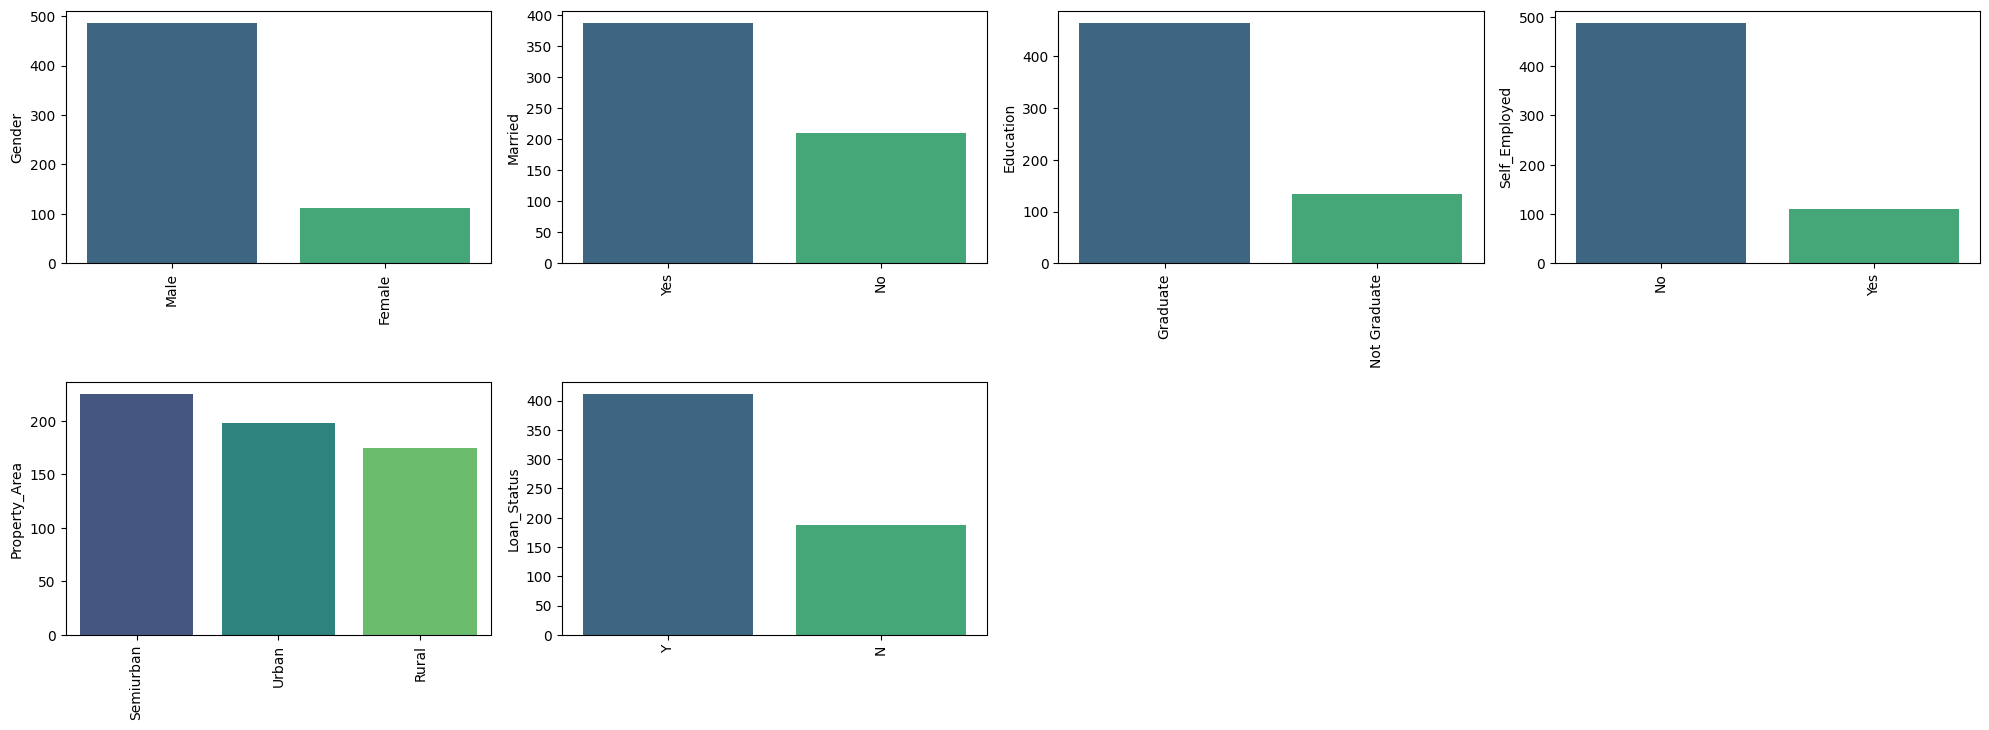

In [8]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(20,40))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y,hue=list(y.index), legend = False, palette="viridis")
  plt.ylabel(col)
  index +=1

plt.tight_layout()
plt.show()

In [9]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

In [10]:
# To find the number of columns with
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


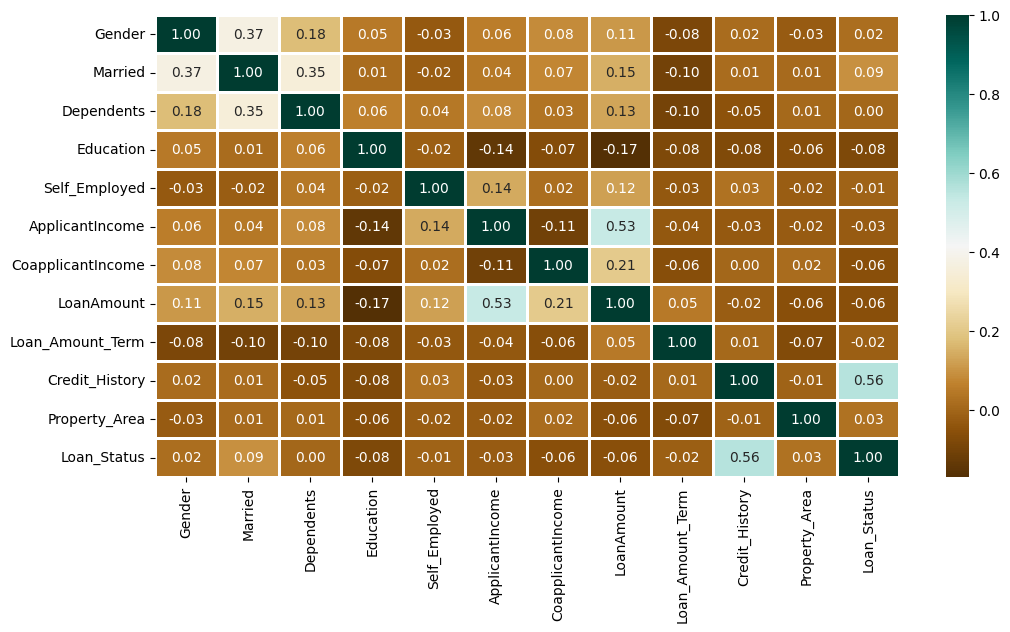

In [11]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)
plt.show()

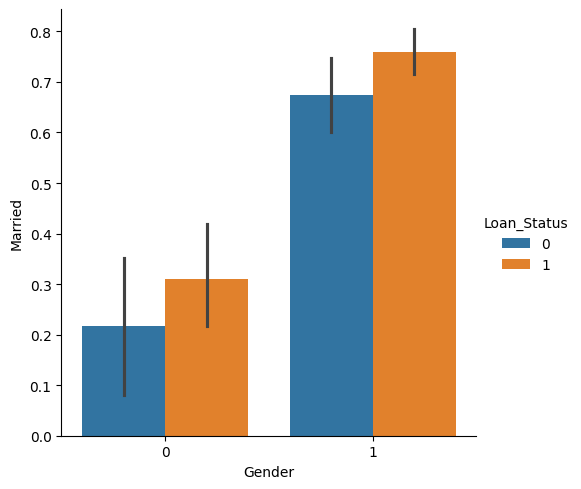

In [12]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status",
            kind="bar",
            data=data)
plt.show()

In [13]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())

data.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [14]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

#KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [17]:
y_pred = knn_model.predict(X_test)

In [18]:
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.7041666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.32      0.39        73
           1       0.74      0.87      0.80       167

    accuracy                           0.70       240
   macro avg       0.63      0.59      0.60       240
weighted avg       0.68      0.70      0.68       240



# SVM

In [19]:
from sklearn.svm import SVC

In [20]:
svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svm_model = svm_model.fit(X_train, Y_train)

In [21]:
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.6541666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.07      0.11        73
           1       0.69      0.91      0.79       167

    accuracy                           0.65       240
   macro avg       0.47      0.49      0.45       240
weighted avg       0.56      0.65      0.58       240



# Random Forest classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf_model = RandomForestClassifier(n_estimators = 7, criterion ='entropy', random_state =7)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7)

In [24]:
y_pred = rf_model.predict(X_test)

In [25]:
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.825
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.62      0.68        73
           1       0.85      0.92      0.88       167

    accuracy                           0.82       240
   macro avg       0.80      0.77      0.78       240
weighted avg       0.82      0.82      0.82       240



# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lg_model = LogisticRegression(solver = 'liblinear',max_iter =2000)
lg_model = lg_model.fit(X_train, Y_train)

In [28]:
y_pred = lg_model.predict(X_test)

In [29]:
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.825
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.48      0.62        73
           1       0.81      0.98      0.89       167

    accuracy                           0.82       240
   macro avg       0.85      0.73      0.76       240
weighted avg       0.84      0.82      0.81       240

